In [1]:
import numpy as np

In [19]:
class Perceptron:
    
    def __init__ (self, train_data, test_data, train_target, lr = 0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.train_data = train_data
        self.test_data = test_data
        self.train_target = train_target
        self.weights = None
        self.bias = None
        
        
    def fit(self):
        n_samples, n_features = self.train_data.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        target_ = np.array([1 if i > 0 else 0 for i in self.train_target])
        
        for _ in range(self.n_iters):
            for idx, train_i in enumerate(self.train_data):
                lin_pred = np.dot(train_i, self.weights) + self.bias
                predicted = self.activation_func(lin_pred)
                
                update = self.lr * (target_[idx] - predicted)
                self.weights += update * train_i
                self.bias += update 
    
    def predict(self):
        lin_pred = np.dot(self.test_data, self.weights) + self.bias
        predicted = self.activation_func(lin_pred)
        return predicted
    
    def _unit_step_func(self, predicted):
        return np.where(predicted >= 0, 1, 0)

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split as TTS
import matplotlib.pyplot as plt

In [6]:
data, target = datasets.make_blobs(n_samples = 150, n_features = 2, centers = 2, cluster_std = 1.05, random_state = 2)

In [7]:
train_data, test_data, train_target, test_target = TTS(data, target, train_size = 0.7, shuffle = True)

In [30]:
def accuracy(true, predicted):
    acc = np.sum(true == predicted)/ len(true)
    return acc

In [9]:
test_data

array([[ 1.57354644e+00, -2.17601731e+00],
       [ 6.61771687e-01, -2.71105436e+00],
       [-2.90411030e+00, -1.16682599e+01],
       [-4.14163801e-01, -8.17085180e+00],
       [-1.21184474e-01, -1.40749481e+00],
       [-1.94651523e+00, -8.94765931e+00],
       [ 6.02120538e-01, -9.93193935e+00],
       [ 1.19440189e+00, -1.98887161e+00],
       [-2.01362140e+00, -1.04568119e+01],
       [ 2.82215236e+00, -1.76342807e+00],
       [ 1.69068204e+00, -5.21923247e-01],
       [-1.27170922e-01, -1.97912985e+00],
       [-3.24949022e-01, -3.08480293e-01],
       [-7.53151890e-01, -1.03678998e+01],
       [-3.10495944e+00, -8.38861021e+00],
       [-1.99166131e+00, -1.09928863e+01],
       [-3.90196076e-01, -3.42042542e+00],
       [ 1.37033956e+00, -6.40220712e-01],
       [ 2.16363071e+00, -8.46207098e+00],
       [-4.40962962e-01, -8.15573102e+00],
       [-1.94963972e+00, -1.07284683e+01],
       [ 1.12431439e+00, -4.99224897e-01],
       [-1.68069426e+00, -9.41166190e+00],
       [-1.

In [10]:
train_data[:5]

array([[  0.99093279,  -1.43980862],
       [  2.60159789,  -3.37869021],
       [ -0.94967461,  -0.94653968],
       [ -2.03531849, -10.09406069],
       [  1.86418091,  -0.63139908]])

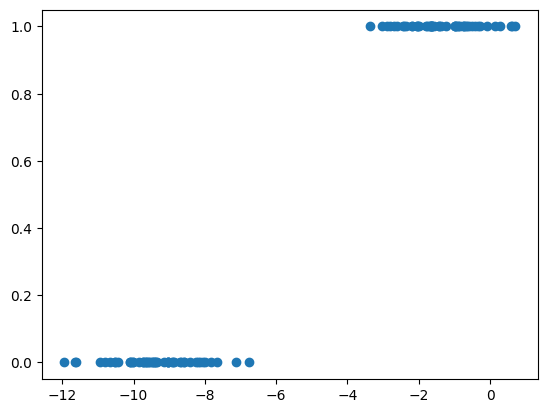

In [15]:
plt.scatter(train_data[:, 1], train_target)

In [16]:
plt.show()

In [20]:
node = Perceptron(train_data = train_data, test_data = test_data, train_target = train_target)

In [21]:
node.fit()

In [22]:
predicted = node.predict()

In [23]:
predicted

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1])

In [31]:
acc = accuracy(true = test_target, predicted = predicted)

In [32]:
acc

1.0